In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import warnings
warnings.filterwarnings('ignore')

# Настройки графиков
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

In [33]:
print("Загрузка данных...")
# Загружаем только необходимые колонки для экономии памяти
columns_to_use = [
    'Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location', 'Country',
    'latitude', 'longitude', 'Work Type', 'Company Size', 'Job Posting Date',
    'Role', 'Job Portal', 'skills'
]

df = pd.read_csv('job_descriptions.csv', usecols=columns_to_use)
print(f"Данные загружены: {len(df)} строк")
df

Загрузка данных...
Данные загружены: 1615940 строк


,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Role,Job Portal,skills
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,2022-04-24,Social Media Manager,Snagajob,"Social media platforms (e.g., Facebook, Twitte..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,2022-12-19,Frontend Web Developer,Idealist,"HTML, CSS, JavaScript Frontend frameworks (e.g..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,2022-09-14,Quality Control Manager,Jobs2Careers,Quality control processes and methodologies St...
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,2023-02-25,Wireless Network Engineer,FlexJobs,Wireless network design and architecture Wi-Fi...
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,2022-10-11,Conference Manager,Jobs2Careers,Event planning Conference logistics Budget man...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615935,134563577088850,0 to 12 Years,B.Tech,$64K-$114K,"Malabo (de jure),",Equatorial Guinea,1.6508,10.2679,Full-Time,18281,2022-05-19,Mechanical Design Engineer,ZipRecruiter,"Mechanical engineering CAD software (e.g., Sol..."
1615936,618604818190827,2 to 14 Years,M.Tech,$62K-$130K,Warsaw,Poland,51.9194,19.1451,Intern,63621,2023-03-14,IT Director,USAJOBS,Strategic IT planning Leadership and managemen...
1615937,615471367712200,4 to 15 Years,BCA,$60K-$96K,Ashgabat,Turkmenistan,38.9697,59.5563,Part-Time,114287,2022-01-23,Mechanical Design Engineer,Indeed,"Mechanical engineering CAD software (e.g., Sol..."
1615938,804137342023945,5 to 15 Years,BCA,$65K-$103K,Ouagadougou,Burkina Faso,12.2383,-1.5616,Full-Time,45009,2021-12-28,Training Coordinator,Stack Overflow Jobs,Training program coordination Training materia...


In [34]:
# Функции для парсинга
def parse_salary(salary_str):
    if pd.isna(salary_str):
        return np.nan
    numbers = re.findall(r'[\d,]+', str(salary_str))
    if len(numbers) >= 2:
        min_sal = float(numbers[0].replace(',', ''))
        max_sal = float(numbers[1].replace(',', ''))
        return (min_sal + max_sal) / 2
    elif len(numbers) == 1:
        return float(numbers[0].replace(',', ''))
    return np.nan

def parse_experience(exp_str):
    if pd.isna(exp_str):
        return np.nan
    numbers = re.findall(r'[\d.]+', str(exp_str))
    if numbers:
        return float(numbers[0])
    return np.nan

print("Обработка данных...")
# Применяем функции к данным
df['salary_avg'] = df['Salary Range'].apply(parse_salary)
df['experience_years'] = df['Experience'].apply(parse_experience)
df['Job Posting Date'] = pd.to_datetime(df['Job Posting Date'], errors='coerce')
df['posting_month'] = df['Job Posting Date'].dt.month
df['posting_year'] = df['Job Posting Date'].dt.year

print("Основная статистика:")
print(f"Уникальных стран: {df['Country'].nunique()}")
print(f"Уникальных ролей: {df['Role'].nunique()}")
print(f"Средняя зарплата: {df['salary_avg'].median():.0f}")

Обработка данных...
Основная статистика:
Уникальных стран: 216
Уникальных ролей: 376
Средняя зарплата: 82



=== ГИПОТЕЗА 1: Географическое распределение зарплат ===


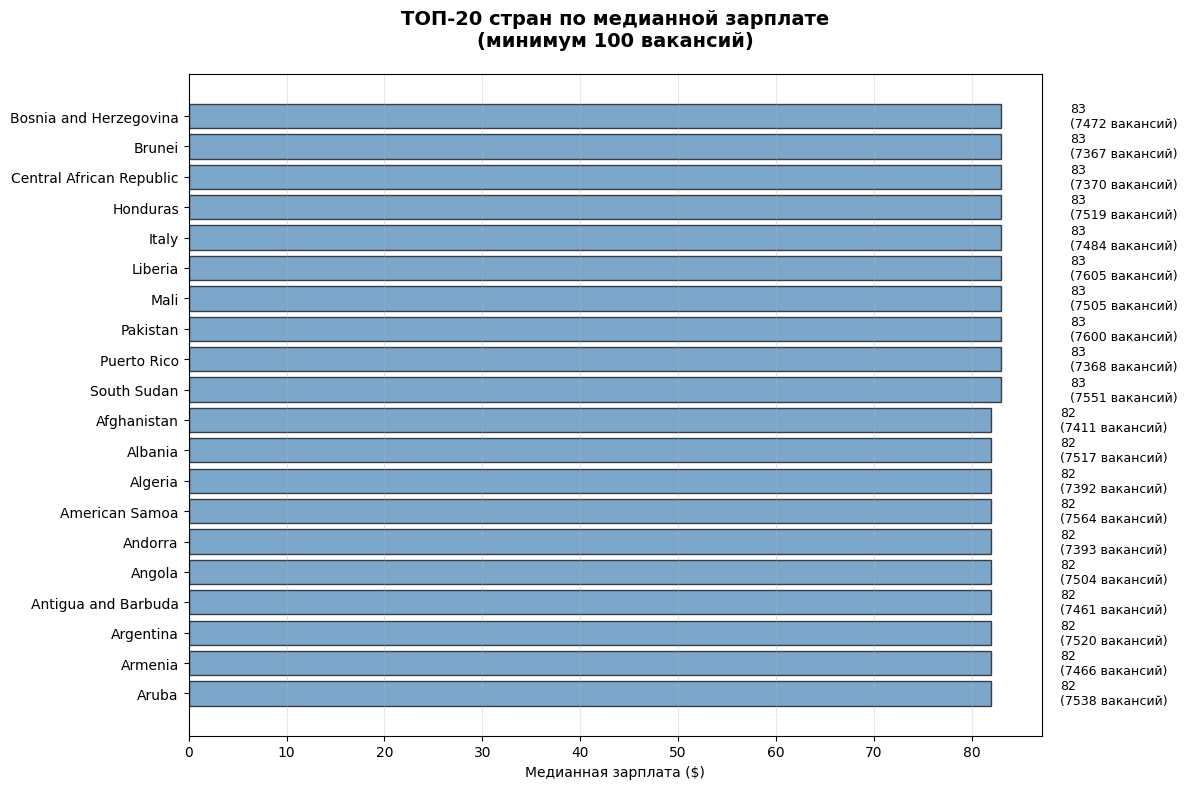

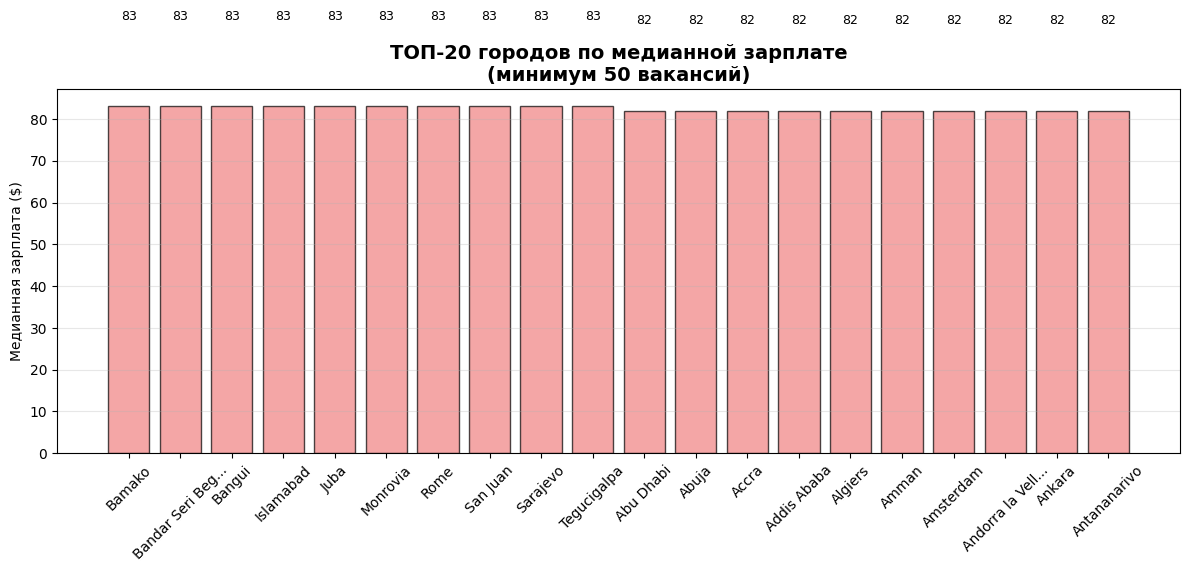

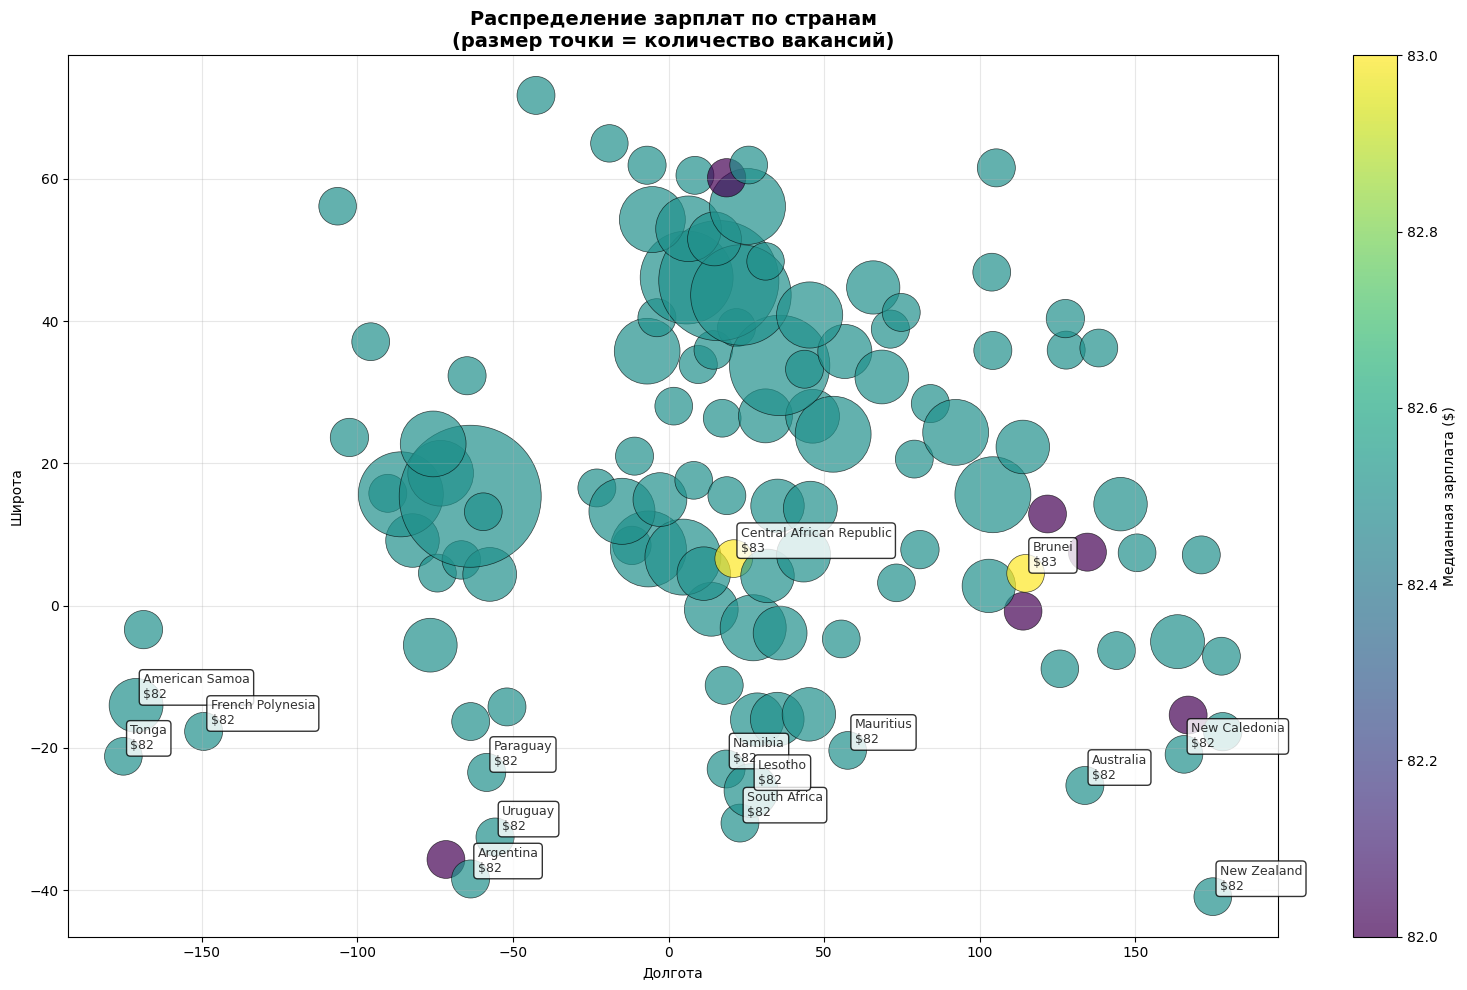

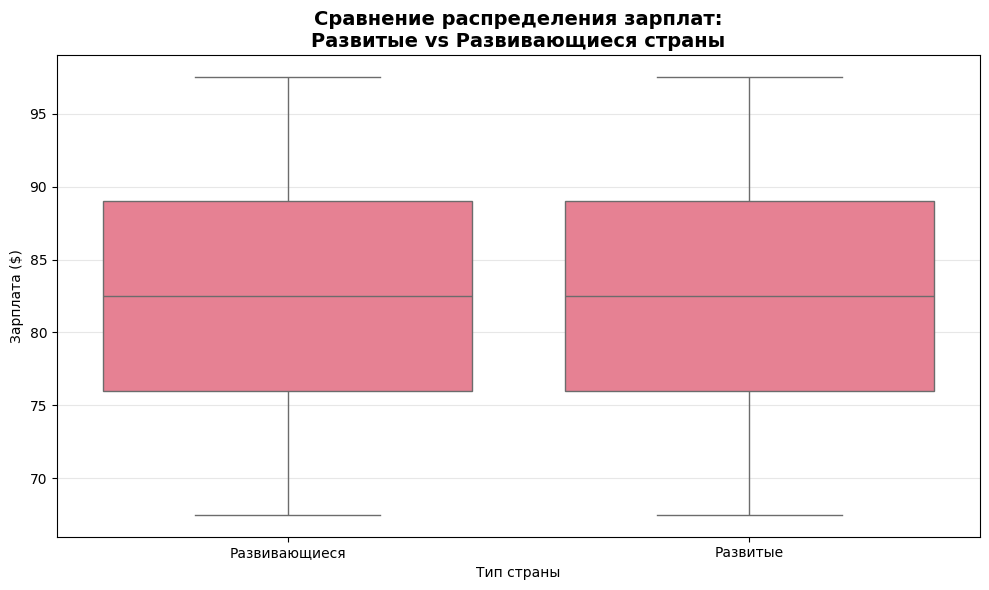


Статистика по гипотезе 1:
Разброс зарплат между странами: 1.0x
Страна с самой высокой медианной зарплатой: Bosnia and Herzegovina (83)
Страна с самой низкой медианной зарплатой: Afghanistan (82)
ТОП-5 стран с самыми высокими медианными зарплатами:
                          median_salary  vacancy_count
Country                                               
Honduras                           83.0           7519
Central African Republic           83.0           7370
Brunei                             83.0           7367
Bosnia and Herzegovina             83.0           7472
Mali                               83.0           7505

ТОП-5 стран с самыми низкими медианными зарплатами:
                       median_salary  vacancy_count
Country                                            
Virgin Islands (U.S.)           82.0           7438
West Bank and Gaza              82.0           7554
Yemen                           82.0           7537
Zambia                          82.0           7555
Z

In [104]:
print("\n=== ГИПОТЕЗА 1: Географическое распределение зарплат ===")

# 1.1 ТОП-10 стран по медианной зарплате
country_stats = df.groupby('Country').agg({
    'salary_avg': ['median', 'count']
}).round(0)
country_stats.columns = ['median_salary', 'vacancy_count']
country_stats = country_stats[country_stats['vacancy_count'] >= 100]  # Только страны с достаточным количеством данных
top_countries = country_stats.nlargest(20, 'median_salary')

plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(top_countries)), top_countries['median_salary'], 
                color='steelblue', alpha=0.7, edgecolor='black')
plt.yticks(range(len(top_countries)), top_countries.index)
plt.title('ТОП-20 стран по медианной зарплате\n(минимум 100 вакансий)', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Медианная зарплата ($)')
plt.grid(axis='x', alpha=0.3)

# Добавляем значения и количество вакансий
for i, (bar, (country, data)) in enumerate(zip(bars, top_countries.iterrows())):
    plt.text(bar.get_width() + 7, bar.get_y() + bar.get_height()/2, 
             f'{data["median_salary"]:,.0f}\n({int(data["vacancy_count"])} вакансий)', 
             ha='left', va='center', fontsize=9)

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 1.2 ТОП-20 городов по зарплатам (только города с >50 вакансиями)
city_stats = df.groupby('location').agg({
    'salary_avg': ['median', 'count']
}).round(0)
city_stats.columns = ['median_salary', 'vacancy_count']
city_stats = city_stats[city_stats['vacancy_count'] >= 50]
top_cities = city_stats.nlargest(20, 'median_salary')

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(top_cities)), top_cities['median_salary'], 
               color='lightcoral', alpha=0.7, edgecolor='black')
plt.xticks(range(len(top_cities)), [city[:15] + '...' if len(city) > 15 else city 
           for city in top_cities.index], rotation=45)
plt.title('ТОП-20 городов по медианной зарплате\n(минимум 50 вакансий)', fontsize=14, fontweight='bold')
plt.ylabel('Медианная зарплата ($)')
plt.grid(axis='y', alpha=0.3)

# Добавляем значения на бары
for bar, (city, data) in zip(bars, top_cities.iterrows()):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 20, 
             f'{data["median_salary"]:,.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# 1.3 Распределение зарплат по географическим регионам с подписями стран
if 'latitude' in df.columns and 'longitude' in df.columns:
    df['lat_bin'] = (df['latitude'] // 10 * 10).astype(int)
    df['lon_bin'] = (df['longitude'] // 10 * 10).astype(int)
    # Группируем по странам для получения средних координат и статистик
    country_geo_stats = df.groupby(['lat_bin', 'lon_bin']).agg({
        'latitude': 'mean',
        'longitude': 'mean', 
        'salary_avg': 'median',
        'Job Id': 'count',
        'Country': lambda x: x.mode()[0]  # Наиболее частая страна в бине
    }).reset_index()
    
    # Фильтруем только страны с достаточным количеством данных
    country_geo_stats = country_geo_stats[country_geo_stats['Job Id'] >= 50]
    
    plt.figure(figsize=(16, 10))
    scatter = plt.scatter(country_geo_stats['longitude'], country_geo_stats['latitude'], 
                         c=country_geo_stats['salary_avg'], cmap='viridis', 
                         s=country_geo_stats['Job Id']*0.10, alpha=0.7, edgecolors='black', linewidth=0.5)
    
    top_15_countries = country_geo_stats.nlargest(15, 'salary_avg')
    # Добавляем подписи только для топ-15 стран
    for i, row in top_15_countries.iterrows():
        plt.annotate(f"{row['Country']}\n${row['salary_avg']:,.0f}", 
                    xy=(row['longitude'], row['latitude']),
                    xytext=(5, 5),
                    textcoords='offset points',
                    fontsize=9,
                    alpha=0.8,
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
    
    plt.colorbar(scatter, label='Медианная зарплата ($)')
    plt.xlabel('Долгота')
    plt.ylabel('Широта')
    plt.title('Распределение зарплат по странам\n(размер точки = количество вакансий)', 
              fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


# 1.4 Сравнение зарплат между развитыми и развивающимися странами
developed_countries = ['United States', 'United Kingdom', 'Germany', 'Canada', 'Australia', 
                      'Japan', 'France', 'Switzerland', 'Singapore', 'Netherlands']

df['country_type'] = df['Country'].apply(
    lambda x: 'Развитые' if x in developed_countries else 'Развивающиеся'
)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df['salary_avg'].notna()], x='country_type', y='salary_avg', 
            showfliers=False)
plt.title('Сравнение распределения зарплат:\nРазвитые vs Развивающиеся страны', 
          fontsize=14, fontweight='bold')
plt.xlabel('Тип страны')
plt.ylabel('Зарплата ($)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Статистика по гипотезе 1
print("\nСтатистика по гипотезе 1:")
print(f"Разброс зарплат между странами: {country_stats['median_salary'].max()/country_stats['median_salary'].min():.1f}x")
print(f"Страна с самой высокой медианной зарплатой: {top_countries.index[0]} ({top_countries.iloc[0]['median_salary']:,.0f})")
print(f"Страна с самой низкой медианной зарплатой: {country_stats.nsmallest(1, 'median_salary').index[0]} ({country_stats['median_salary'].min():,.0f})")




# Анализ распределения зарплат по странам
country_stats = df.groupby('Country').agg({
    'salary_avg': ['median', 'count']
}).round(0)

country_stats.columns = ['median_salary', 'vacancy_count']
country_stats = country_stats.sort_values('median_salary', ascending=False)

print("ТОП-5 стран с самыми высокими медианными зарплатами:")
print(country_stats.head(5))
print("\nТОП-5 стран с самыми низкими медианными зарплатами:")
print(country_stats.tail(5))

# Статистика разброса зарплат
max_salary = country_stats['median_salary'].max()
min_salary = country_stats['median_salary'].min()
salary_ratio = max_salary / min_salary

print(f"\nРазброс зарплат между странами: {salary_ratio:.1f}x")
print(f"Самая высокая медианная зарплата: {max_salary:,.0f}")
print(f"Самая низкая медианная зарплата: {min_salary:,.0f}")


=== ГИПОТЕЗА 2: Навыки по профессиональным ролям ===
Обработка навыков...


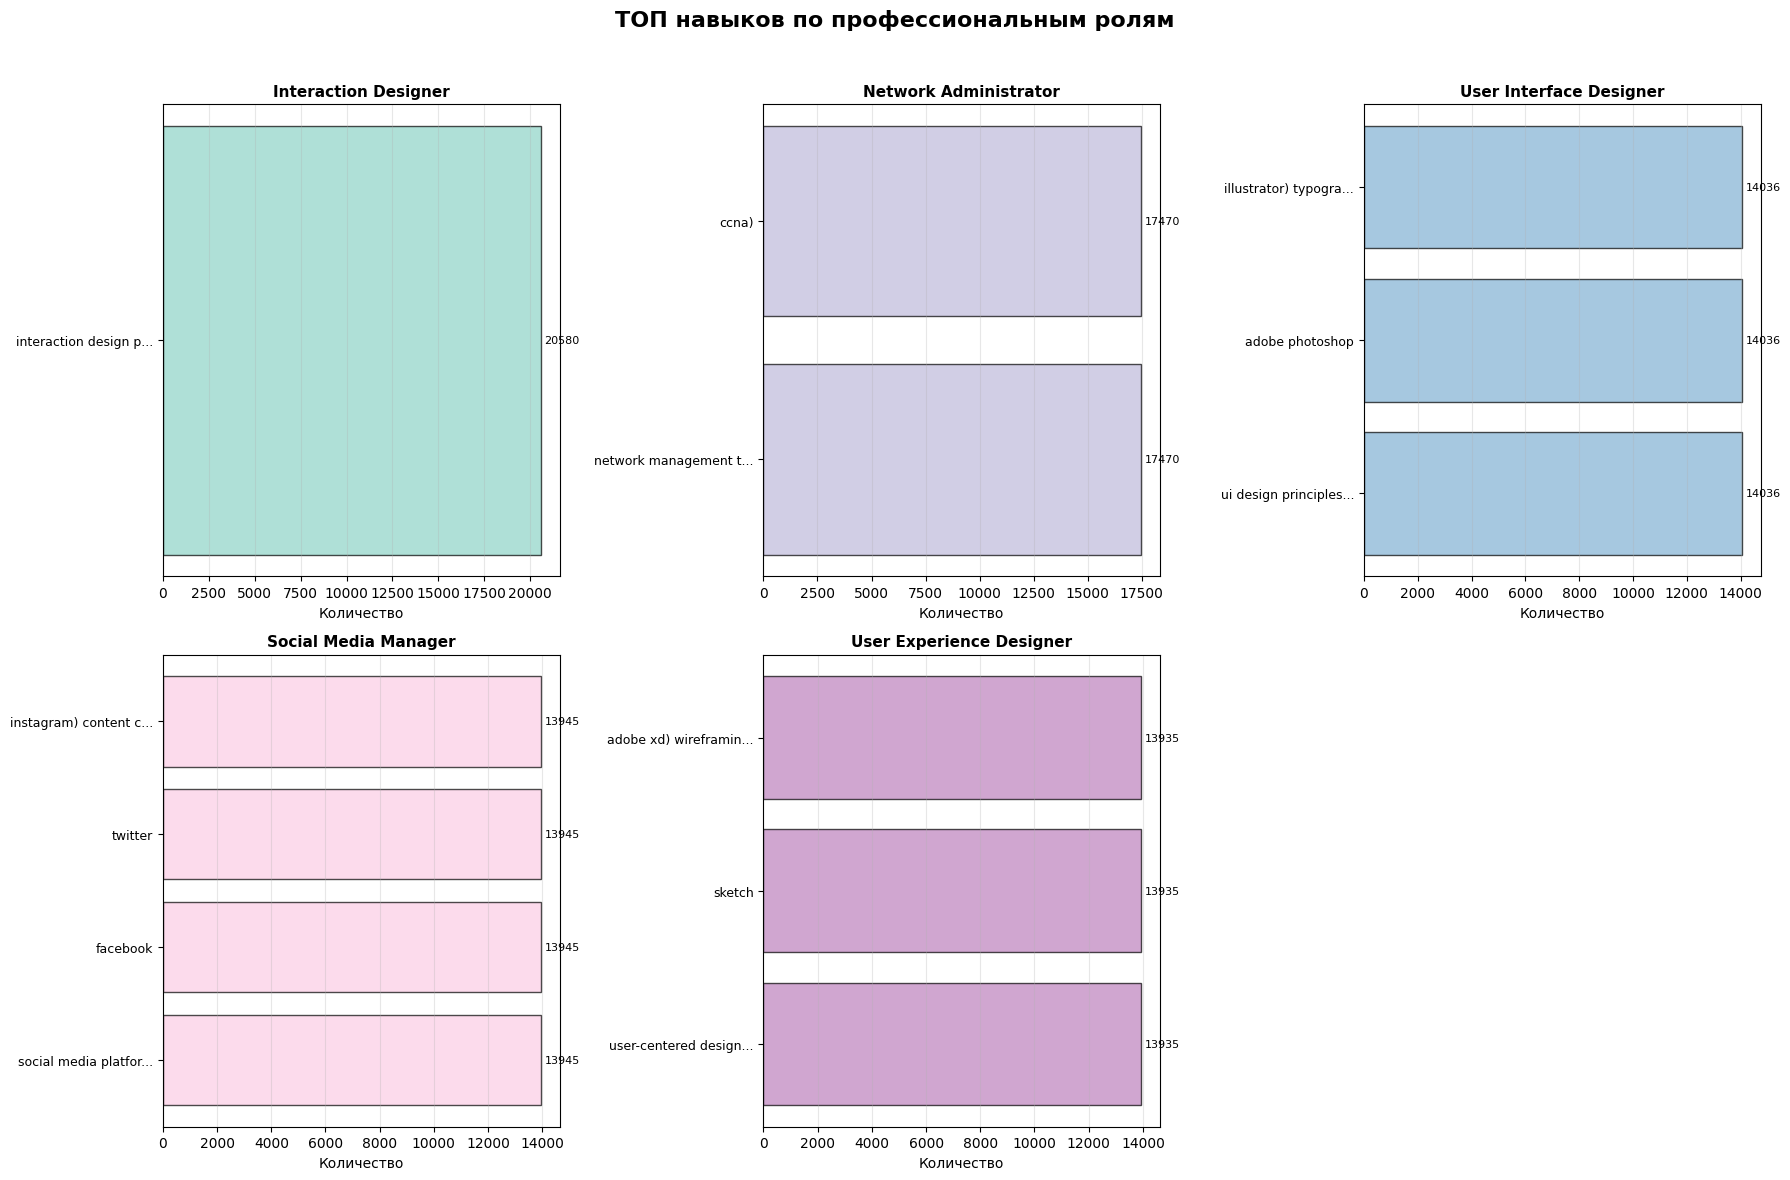


Статистика по гипотезе 2:
- Interaction Designer: 1 уникальных навыков
- Network Administrator: 2 уникальных навыков
- User Interface Designer: 3 уникальных навыков
- Social Media Manager: 4 уникальных навыков
- User Experience Designer: 3 уникальных навыков
ТОП-5 профессиональных ролей по количеству вакансий:
Role
Interaction Designer        20580
Network Administrator       17470
User Interface Designer     14036
Social Media Manager        13945
User Experience Designer    13935
Name: count, dtype: int64

Статистика по навыкам для каждой роли:
Interaction Designer: 20580 вакансий с указанием навыков
Network Administrator: 17470 вакансий с указанием навыков
User Interface Designer: 14036 вакансий с указанием навыков
Social Media Manager: 13945 вакансий с указанием навыков
User Experience Designer: 13935 вакансий с указанием навыков


In [108]:
print("\n=== ГИПОТЕЗА 2: Навыки по профессиональным ролям ===")

def clean_skills(skills_text):
    if pd.isna(skills_text):
        return []
    skills = re.split(r'[,;•\n]', str(skills_text))
    cleaned_skills = [skill.strip().lower() for skill in skills if len(skill.strip()) > 2]
    return cleaned_skills

# Берем только ТОП-5 ролей по количеству вакансий для анализа
top_roles = df['Role'].value_counts().head(5).index
roles_sample = df[df['Role'].isin(top_roles)].copy()

print("Обработка навыков...")
roles_sample['skills_cleaned'] = roles_sample['skills'].apply(clean_skills)

# 2.1 ТОП навыки по ролям - один комбинированный график
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, role in enumerate(top_roles):
    row, col = i // 3, i % 3
    role_data = roles_sample[roles_sample['Role'] == role]
    
    # Собираем все навыки для роли
    all_skills = []
    for skills_list in role_data['skills_cleaned']:
        all_skills.extend(skills_list)
    
    # Считаем частоту и берем топ-6
    skill_counts = Counter(all_skills)
    top_skills = skill_counts.most_common(6)
    
    if top_skills:
        skills, counts = zip(*top_skills)
        y_pos = np.arange(len(skills))
        
        bars = axes[row, col].barh(y_pos, counts, color=plt.cm.Set3(i/len(top_roles)), 
                                 alpha=0.7, edgecolor='black')
        axes[row, col].set_yticks(y_pos)
        # Обрезаем длинные названия
        short_skills = [s[:20] + '...' if len(s) > 20 else s for s in skills]
        axes[row, col].set_yticklabels(short_skills, fontsize=9)
        axes[row, col].set_title(f'{role}', fontsize=11, fontweight='bold')
        axes[row, col].set_xlabel('Количество')
        axes[row, col].grid(axis='x', alpha=0.3)
        
        # Добавляем значения
        for j, count in enumerate(counts):
            axes[row, col].text(count + count*0.01, j, f'{count}', 
                              va='center', fontsize=8)

# Удаляем пустые subplots
if len(top_roles) < 6:
    for i in range(len(top_roles), 6):
        row, col = i // 3, i % 3
        fig.delaxes(axes[row, col])

# Добавляем общий заголовок с правильным отступом
plt.suptitle('ТОП навыков по профессиональным ролям', fontsize=16, fontweight='bold', y=0.98)

# Настраиваем layout чтобы избежать наложения
plt.tight_layout(rect=[0, 0, 1, 0.96])  # rect определяет область для размещения [left, bottom, right, top]
plt.show()


print("\nСтатистика по гипотезе 2:")
for role in top_roles:
    role_skills = roles_sample[roles_sample['Role'] == role]['skills_cleaned']
    all_skills = [skill for skills_list in role_skills for skill in skills_list]
    unique_skills = len(set(all_skills))
    print(f"- {role}: {unique_skills} уникальных навыков")
    
# Анализ навыков по профессиональным ролям
print("ТОП-5 профессиональных ролей по количеству вакансий:")
top_roles = df['Role'].value_counts().head(5)
print(top_roles)

print("\nСтатистика по навыкам для каждой роли:")
for role in top_roles.index:
    role_data = df[df['Role'] == role]
    skills_count = role_data['skills'].notna().sum()
    print(f"{role}: {skills_count} вакансий с указанием навыков")
    
    # Анализ уникальных навыков (если нужно)
    if skills_count > 0:
        all_skills = []
        for skills_text in role_data['skills'].dropna():
            # Добавьте здесь код для извлечения навыков из текста
            pass


=== ГИПОТЕЗА 3: Временной анализ спроса ===


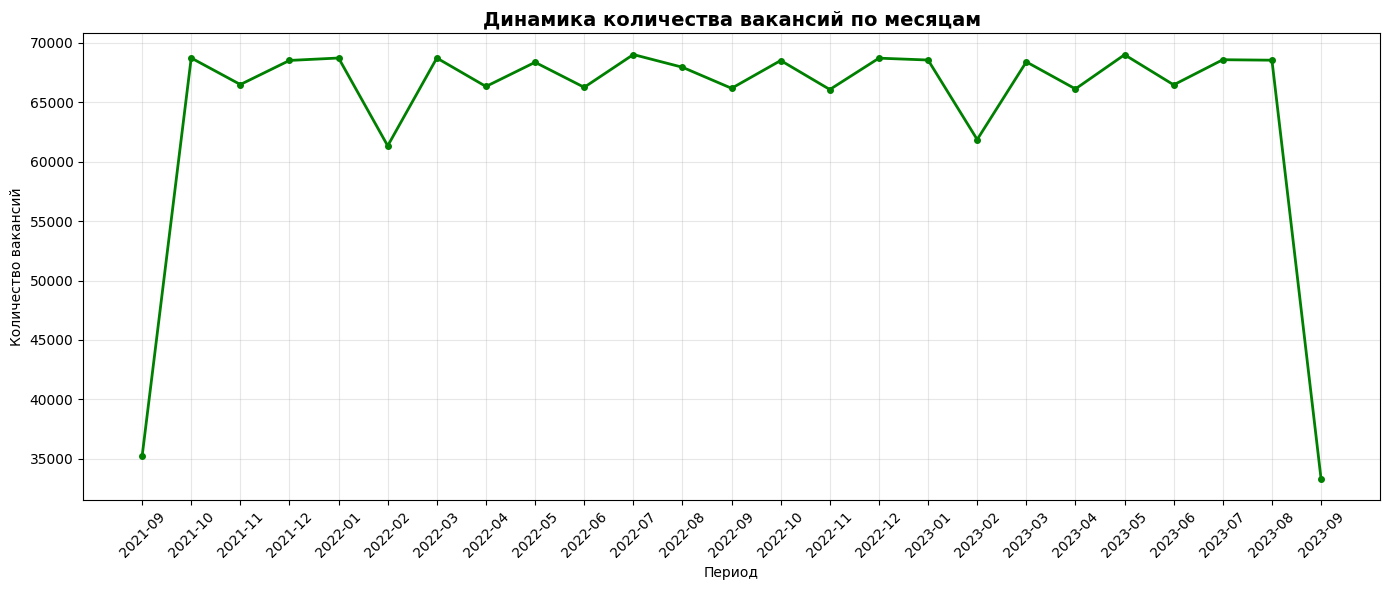

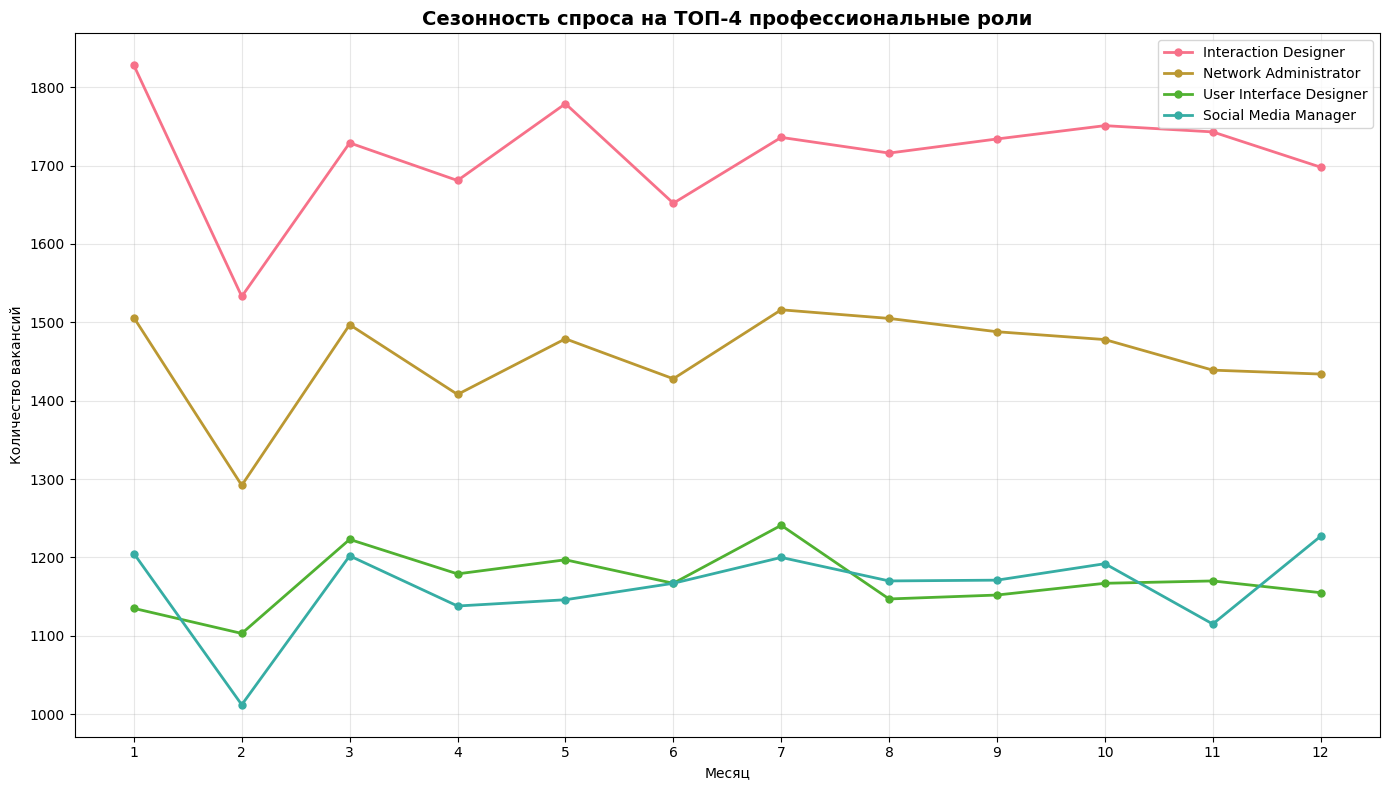

Анализ сезонности для ТОП-4 профессиональных ролей:
Анализируемые роли: ['Interaction Designer', 'Network Administrator', 'User Interface Designer', 'Social Media Manager']

Interaction Designer:
Всего вакансий: 20580
Пик спроса: месяц 1 (1828 вакансий)
Спад спроса: месяц 2 (1533 вакансий)
Разница: 295 вакансий
Сезонность: 19.2%

Network Administrator:
Всего вакансий: 17470
Пик спроса: месяц 7 (1516 вакансий)
Спад спроса: месяц 2 (1292 вакансий)
Разница: 224 вакансий
Сезонность: 17.3%

User Interface Designer:
Всего вакансий: 14036
Пик спроса: месяц 7 (1241 вакансий)
Спад спроса: месяц 2 (1103 вакансий)
Разница: 138 вакансий
Сезонность: 12.5%

Social Media Manager:
Всего вакансий: 13945
Пик спроса: месяц 12 (1227 вакансий)
Спад спроса: месяц 2 (1012 вакансий)
Разница: 215 вакансий
Сезонность: 21.2%


In [109]:
print("\n=== ГИПОТЕЗА 3: Временной анализ спроса ===")

# 3.1 Общая динамика вакансий по месяцам
monthly_trend = df.groupby(['posting_year', 'posting_month']).size().reset_index(name='count')
monthly_trend = monthly_trend.sort_values(['posting_year', 'posting_month'])
monthly_trend['period'] = monthly_trend['posting_year'].astype(str) + '-' + monthly_trend['posting_month'].astype(str).str.zfill(2)

plt.figure(figsize=(14, 6))
plt.plot(monthly_trend['period'], monthly_trend['count'], 
         marker='o', linewidth=2, markersize=4, color='green')
plt.title('Динамика количества вакансий по месяцам', fontsize=14, fontweight='bold')
plt.xlabel('Период')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3.2 Сезонность для ТОП-4 ролей
top_4_roles = df['Role'].value_counts().head(4).index
role_monthly = df[df['Role'].isin(top_4_roles)].groupby(['posting_month', 'Role']).size().reset_index(name='count')

plt.figure(figsize=(14, 8))
for role in top_4_roles:
    role_data = role_monthly[role_monthly['Role'] == role].sort_values('posting_month')
    plt.plot(role_data['posting_month'], role_data['count'], 
             marker='o', linewidth=2, label=role, markersize=5)

plt.title('Сезонность спроса на ТОП-4 профессиональные роли', fontsize=14, fontweight='bold')
plt.xlabel('Месяц')
plt.ylabel('Количество вакансий')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# Анализ сезонности спроса на профессиональные роли
print("Анализ сезонности для ТОП-4 профессиональных ролей:")

# Получим ТОП-4 роли
top_4_roles = df['Role'].value_counts().head(4).index
print(f"Анализируемые роли: {list(top_4_roles)}")

# Анализ по месяцам
for role in top_4_roles:
    role_data = df[df['Role'] == role]
    monthly_trend = role_data.groupby('posting_month').size()
    
    print(f"\n{role}:")
    print(f"Всего вакансий: {len(role_data)}")
    
    if not monthly_trend.empty:
        peak_month = monthly_trend.idxmax()
        peak_count = monthly_trend.max()
        low_month = monthly_trend.idxmin()
        low_count = monthly_trend.min()
        
        print(f"Пик спроса: месяц {peak_month} ({peak_count} вакансий)")
        print(f"Спад спроса: месяц {low_month} ({low_count} вакансий)")
        print(f"Разница: {peak_count - low_count} вакансий")
        
        # Сезонность (разница между пиком и спадом в процентах)
        if low_count > 0:
            seasonality_ratio = (peak_count / low_count - 1) * 100
            print(f"Сезонность: {seasonality_ratio:.1f}%")


=== ГИПОТЕЗА 4: Межстрановые различия в требованиях ===
Доступные роли в данных:
Role
Interaction Designer         20580
Network Administrator        17470
User Interface Designer      14036
Social Media Manager         13945
User Experience Designer     13935
Procurement Analyst          13757
Social Media Analyst         10659
Quality Assurance Analyst    10541
SEO Specialist               10512
Executive Assistant          10496
Name: count, dtype: int64
Используем самую частую роль: Interaction Designer
Анализируем роль: Interaction Designer
Найдено вакансий для Interaction Designer: 20580
Распределение по странам:
Country
Poland                            120
Latvia                            118
British Virgin Islands            117
Samoa                             117
Finland                           115
China                             115
St. Vincent and the Grenadines    114
Uruguay                           114
Philippines                       113
Russia                

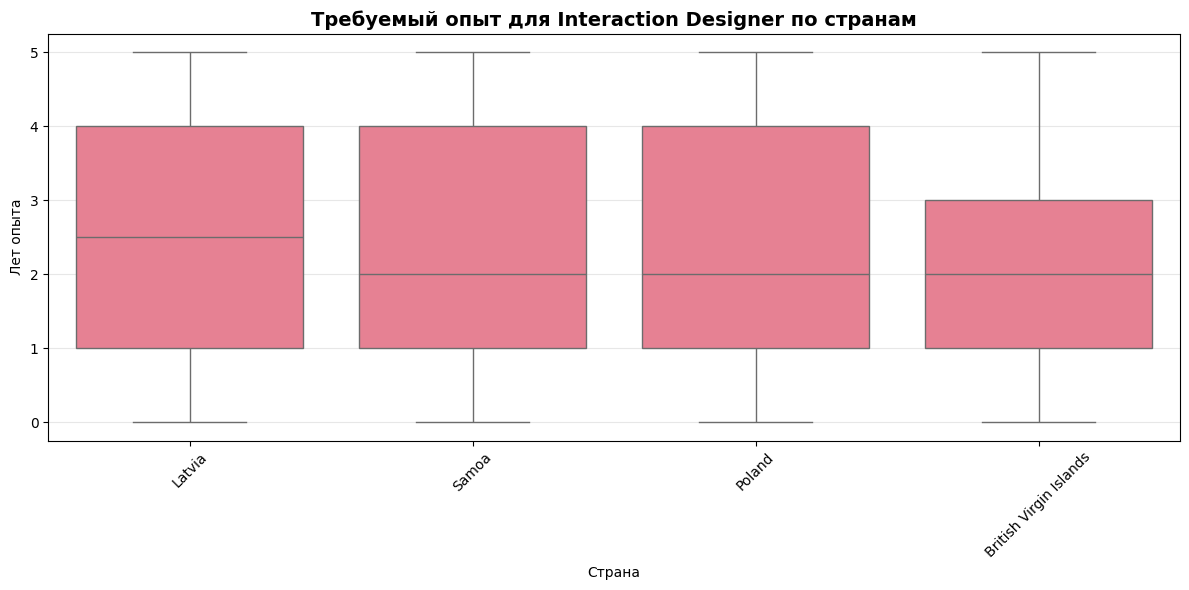

Данных с зарплатами: 472


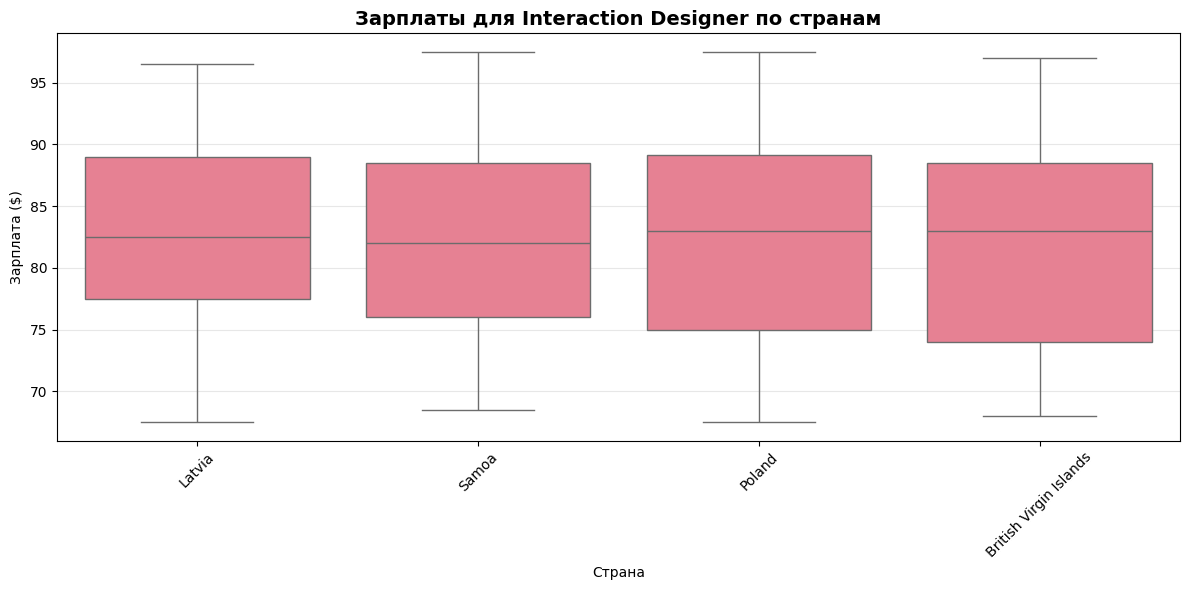

Используем колонку: 'skills' для анализа навыков
Извлечено 472 упоминаний навыков
Найдено 1 уникальных навыков
ТОП-8 навыков для анализа: ['interaction design principles user behavior', 'psychology wireframing', 'prototyping tools animation', 'micro-interaction design collaborative design processes']
Страна Poland: 120 вакансий
  Навык 'interaction design principles user behavior': 120 раз (100.0%)
  Навык 'psychology wireframing': 120 раз (100.0%)
  Навык 'prototyping tools animation': 120 раз (100.0%)
  Навык 'micro-interaction design collaborative design processes': 120 раз (100.0%)
Страна Latvia: 118 вакансий
  Навык 'interaction design principles user behavior': 118 раз (100.0%)
  Навык 'psychology wireframing': 118 раз (100.0%)
  Навык 'prototyping tools animation': 118 раз (100.0%)
  Навык 'micro-interaction design collaborative design processes': 118 раз (100.0%)
Страна British Virgin Islands: 117 вакансий
  Навык 'interaction design principles user behavior': 117 раз (100.0%)


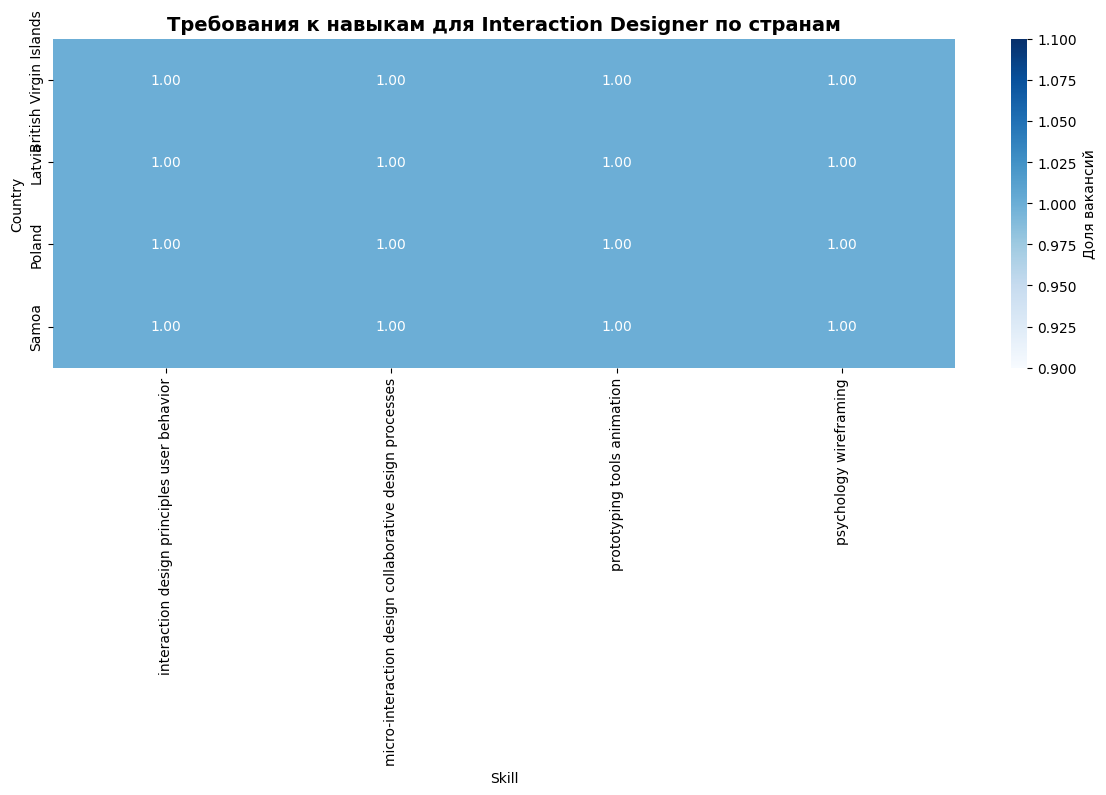


Статистика для Interaction Designer:
- Poland: 120 вакансий, опыт: 2.0, зарплата: 83.0
- Latvia: 118 вакансий, опыт: 2.5, зарплата: 82.5
- British Virgin Islands: 117 вакансий, опыт: 2.0, зарплата: 83.0
- Samoa: 117 вакансий, опыт: 2.0, зарплата: 82.0
=== АНАЛИЗ МЕЖСТРАНОВЫХ РАЗЛИЧИЙ ===
Анализируемая роль: Interaction Designer
Всего вакансий для анализа: 20580
Анализируемые страны: ['Poland', 'Latvia', 'British Virgin Islands', 'Samoa']

Сравнительная статистика по странам:

Poland:
  Вакансий: 120
  Медианный опыт: 2.0 лет
  Медианная зарплата: 83
  Топ-3 навыка: [('interaction design principles user behavior and psychology wireframing and prototyping tools animation and micro-interaction design collaborative design processes', 100)]

Latvia:
  Вакансий: 118
  Медианный опыт: 2.5 лет
  Медианная зарплата: 82
  Топ-3 навыка: [('interaction design principles user behavior and psychology wireframing and prototyping tools animation and micro-interaction design collaborative design proce

In [111]:
print("\n=== ГИПОТЕЗА 4: Межстрановые различия в требованиях ===")

# Сначала проверим, какие роли вообще есть в данных
print("Доступные роли в данных:")
print(df['Role'].value_counts().head(10))

target_role = df['Role'].value_counts().index[0]
print(f"Используем самую частую роль: {target_role}")

print(f"Анализируем роль: {target_role}")

role_data = df[df['Role'] == target_role]
print(f"Найдено вакансий для {target_role}: {len(role_data)}")

if len(role_data) == 0:
    print("Нет данных для выбранной роли! Прерываем анализ гипотезы 4.")
else:
    # Проверим наличие данных по странам
    print("Распределение по странам:")
    print(role_data['Country'].value_counts().head(10))
    
    # Берем ТОП-4 страны по количеству вакансий для этой роли
    top_countries_role = role_data['Country'].value_counts().head(4).index
    print(f"ТОП-4 страны для анализа: {list(top_countries_role)}")
    
    filtered_data = role_data[role_data['Country'].isin(top_countries_role)]
    print(f"Данных после фильтрации по странам: {len(filtered_data)}")
    
    if len(filtered_data) == 0:
        print("Нет данных после фильтрации по странам!")
    else:
        # 4.1 Сравнение требуемого опыта
        exp_data = filtered_data[filtered_data['experience_years'].notna()]
        print(f"Данных с опытом работы: {len(exp_data)}")
        
        if len(exp_data) > 0:
            plt.figure(figsize=(12, 6))
            sns.boxplot(data=exp_data, x='Country', y='experience_years', showfliers=False)
            plt.title(f'Требуемый опыт для {target_role} по странам', fontsize=14, fontweight='bold')
            plt.xlabel('Страна')
            plt.ylabel('Лет опыта')
            plt.xticks(rotation=45)
            plt.grid(axis='y', alpha=0.3)
            plt.tight_layout()
            plt.show()
        else:
            print("Нет данных об опыте работы для построения графика")
        
        # 4.2 Сравнение зарплат
        salary_data = filtered_data[filtered_data['salary_avg'].notna()]
        print(f"Данных с зарплатами: {len(salary_data)}")
        
        if len(salary_data) > 0:
            plt.figure(figsize=(12, 6))
            sns.boxplot(data=salary_data, x='Country', y='salary_avg', showfliers=False)
            plt.title(f'Зарплаты для {target_role} по странам', fontsize=14, fontweight='bold')
            plt.xlabel('Страна')
            plt.ylabel('Зарплата ($)')
            plt.xticks(rotation=45)
            plt.grid(axis='y', alpha=0.3)
            plt.tight_layout()
            plt.show()
        else:
            print("Нет данных о зарплатах для построения графика")
        
        # 4.3 УЛУЧШЕННЫЙ АНАЛИЗ НАВЫКОВ
        
        # Сначала определим правильное название колонки с навыками
        skills_column = None
        possible_skill_columns = ['skills', 'Skills', 'skill', 'Skill', 'competencies', 'Competencies']
        for col in possible_skill_columns:
            if col in filtered_data.columns:
                skills_column = col
                break
        
        if skills_column is None:
            print("Не найдена колонка с навыками в данных")
            skills_column = 'Skills'  # Попробуем по умолчанию
        
        print(f"Используем колонку: '{skills_column}' для анализа навыков")
        
        # Функция для извлечения навыков из текста
        def extract_skills(skills_text):
            if pd.isna(skills_text):
                return []
            
            skills_text = str(skills_text).lower()
            
            # Разные способы разделения навыков
            # Вариант 1: Разделение по запятым, точкам с запятой и т.д.
            skills = re.split(r'[,;•\n]', skills_text)
            
            # Вариант 2: Если текст структурирован как список в строке
            if '[' in skills_text and ']' in skills_text:
                try:
                    skills = eval(skills_text)
                    if isinstance(skills, list):
                        return [s.strip().lower() for s in skills if len(str(s).strip()) > 2]
                except:
                    pass
            
            # Очищаем навыки
            cleaned_skills = []
            for skill in skills:
                skill = skill.strip()
                if len(skill) > 2 and skill not in ['', 'and', 'or', 'the']:
                    cleaned_skills.append(skill)
            
            return cleaned_skills
        
        # Извлекаем все навыки для анализа
        all_skills_list = []
        skills_sample = filtered_data[filtered_data[skills_column].notna()].sample(min(500, len(filtered_data)), random_state=42)
        
        for skills_text in skills_sample[skills_column]:
            extracted_skills = extract_skills(skills_text)
            all_skills_list.extend(extracted_skills)
        
        print(f"Извлечено {len(all_skills_list)} упоминаний навыков")
        
        if len(all_skills_list) > 0:
            # Анализируем частоту навыков
            skill_counts = Counter(all_skills_list)
            print(f"Найдено {len(skill_counts)} уникальных навыков")
            
            # Берем топ-8 самых частых навыков
            top_skills = [skill for skill, count in skill_counts.most_common(8)]
            top_skills = top_skills[0].split(' and ')
            print(f"ТОП-8 навыков для анализа: {top_skills}")
            
            # Если топ-8 пустые, используем запасной список
            if not top_skills or all(count == 1 for count in skill_counts.values()):
                print("Не удалось определить частые навыки, используем запасной список")
                top_skills = ['python', 'java', 'sql', 'javascript', 'communication', 'problem solving', 'teamwork', 'leadership']
            
            # Анализируем частоту навыков по странам
            skill_comparison = []
            
            for country in top_countries_role:
                country_data = filtered_data[filtered_data['Country'] == country]
                total = len(country_data)
                
                print(f"Страна {country}: {total} вакансий")
                
                if total > 0:
                    for skill in top_skills:
                        count = 0
                        for skills_text in country_data[skills_column].dropna():
                            if skill in str(skills_text).lower():
                                count += 1
                        
                        frequency = count / total
                        skill_comparison.append({
                            'Country': country,
                            'Skill': skill,
                            'Frequency': frequency
                        })
                        
                        if count > 0:
                            print(f"  Навык '{skill}': {count} раз ({(frequency*100):.1f}%)")
            
            # Строим heatmap
            if skill_comparison:
                skill_df = pd.DataFrame(skill_comparison)
                
                try:
                    skill_pivot = skill_df.pivot(index='Country', columns='Skill', values='Frequency')
                    
                    # Проверяем, что есть непустые данные
                    if not skill_pivot.empty and skill_pivot.sum().sum() > 0:
                        plt.figure(figsize=(12, 8))
                        sns.heatmap(skill_pivot, annot=True, fmt='.2f', cmap='Blues',
                                   cbar_kws={'label': 'Доля вакансий'})
                        plt.title(f'Требования к навыкам для {target_role} по странам', fontsize=14, fontweight='bold')
                        plt.tight_layout()
                        plt.show()
                    else:
                        print("Нет значимых данных для heatmap")
                        
                        # Альтернатива: показать таблицу
                        print("Данные в табличной форме:")
                        print(skill_pivot)
                        
                except Exception as e:
                    print(f"Ошибка при построении heatmap: {e}")
                    
                    # Альтернатива: показать барплот
                    plt.figure(figsize=(12, 8))
                    for i, skill in enumerate(top_skills):
                        skill_data = skill_df[skill_df['Skill'] == skill]
                        if not skill_data.empty:
                            plt.bar(skill_data['Country'] + f" ({skill})", skill_data['Frequency'], 
                                   alpha=0.7, label=skill)
                    
                    plt.title(f'Требования к навыкам для {target_role} по странам', fontsize=14, fontweight='bold')
                    plt.xlabel('Страна и навык')
                    plt.ylabel('Доля вакансий')
                    plt.xticks(rotation=45)
                    plt.legend()
                    plt.tight_layout()
                    plt.show()
            else:
                print("Нет данных для построения heatmap навыков")
        else:
            print("Не удалось извлечь навыки из данных")
            
            # Запасной вариант: используем общие навыки
            print("Используем общий список навыков для анализа")
            general_skills = ['communication', 'teamwork', 'problem solving', 'leadership', 'analytical', 'technical']
            
            skill_comparison = []
            for country in top_countries_role:
                country_data = filtered_data[filtered_data['Country'] == country]
                total = len(country_data)
                
                if total > 0:
                    for skill in general_skills:
                        count = 0
                        for skills_text in country_data[skills_column].dropna():
                            if skill in str(skills_text).lower():
                                count += 1
                        
                        frequency = count / total
                        skill_comparison.append({
                            'Country': country,
                            'Skill': skill,
                            'Frequency': frequency
                        })
            
            if skill_comparison:
                skill_df = pd.DataFrame(skill_comparison)
                skill_pivot = skill_df.pivot(index='Country', columns='Skill', values='Frequency')
                
                plt.figure(figsize=(12, 8))
                # Настраиваем подписи напрямую в heatmap
                ax = sns.heatmap(skill_pivot, annot=True, fmt='.2f', cmap='Blues', 
                                cbar_kws={'label': 'Доля вакансий'})
                
                # Настраиваем подписи осей
                ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
                ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
                
                plt.title(f'Требования к навыкам для {target_role} по странам', fontsize=14, fontweight='bold')
                plt.tight_layout()
                plt.show()
        
        # Вывод статистики
        print(f"\nСтатистика для {target_role}:")
        for country in top_countries_role:
            country_data = filtered_data[filtered_data['Country'] == country]
            if len(country_data) > 0:
                avg_exp = country_data['experience_years'].median() if country_data['experience_years'].notna().any() else "нет данных"
                avg_salary = country_data['salary_avg'].median() if country_data['salary_avg'].notna().any() else "нет данных"
                print(f"- {country}: {len(country_data)} вакансий, опыт: {avg_exp}, зарплата: {avg_salary}")
            else:
                print(f"- {country}: нет данных")

# Анализ межстрановых различий для конкретной роли
print("=== АНАЛИЗ МЕЖСТРАНОВЫХ РАЗЛИЧИЙ ===")

# Определим целевую роль для анализа (возьмем одну из ТОП-ролей)
target_role = 'Interaction Designer'  # Можно изменить на другую роль из ТОП-5
print(f"Анализируемая роль: {target_role}")

role_data = df[df['Role'] == target_role]
print(f"Всего вакансий для анализа: {len(role_data)}")

# ТОП-4 страны по количеству вакансий для этой роли
top_countries = role_data['Country'].value_counts().head(4).index
print(f"Анализируемые страны: {list(top_countries)}")

print("\nСравнительная статистика по странам:")
comparison_stats = []

for country in top_countries:
    country_data = role_data[role_data['Country'] == country]
    
    # Базовая статистика
    total_vacancies = len(country_data)
    exp_median = country_data['experience_years'].median()
    salary_median = country_data['salary_avg'].median()
    
    # Анализ навыков (топ-3 самых частых)
    skills_list = []
    for skills_text in country_data['skills'].dropna().head(100):  # Ограничим выборку для производительности
        skills_text = str(skills_text).lower()
        # Простая токенизация
        skills = re.split(r'[,;•\n]', skills_text)
        skills_list.extend([s.strip() for s in skills if len(s.strip()) > 3])
    
    skill_counts = Counter(skills_list)
    top_skills = skill_counts.most_common(3)
    
    comparison_stats.append({
        'Country': country,
        'Vacancies': total_vacancies,
        'Median_Experience': exp_median,
        'Median_Salary': salary_median,
        'Top_Skills': top_skills
    })
    
    print(f"\n{country}:")
    print(f"  Вакансий: {total_vacancies}")
    print(f"  Медианный опыт: {exp_median:.1f} лет")
    print(f"  Медианная зарплата: {salary_median:.0f}")
    print(f"  Топ-3 навыка: {top_skills}")

# Анализ разброса показателей
if comparison_stats:
    exp_values = [stat['Median_Experience'] for stat in comparison_stats if not pd.isna(stat['Median_Experience'])]
    salary_values = [stat['Median_Salary'] for stat in comparison_stats if not pd.isna(stat['Median_Salary'])]
    
    if exp_values:
        exp_range = max(exp_values) - min(exp_values)
        print(f"\nРазброс требований к опыту: {exp_range:.1f} лет")
    
    if salary_values:
        salary_range = max(salary_values) - min(salary_values)
        salary_ratio = max(salary_values) / min(salary_values) if min(salary_values) > 0 else 0
        print(f"Разброс зарплат: {salary_range:.0f} ({salary_ratio:.1f}x)")

# Анализ уникальности навыков между странами
print("\nАнализ уникальности навыков между странами:")
all_country_skills = {}
for stat in comparison_stats:
    country = stat['Country']
    skills = [skill for skill, count in stat['Top_Skills']]
    all_country_skills[country] = set(skills)
    print(f"{country}: {skills}")

# Проверка общих навыков
common_skills = set.intersection(*[skills for skills in all_country_skills.values()])
print(f"Общие навыки для всех стран: {common_skills}")

# Проверка уникальных навыков
for country, skills in all_country_skills.items():
    unique_skills = skills - set.union(*[s for c, s in all_country_skills.items() if c != country])
    print(f"Уникальные навыки для {country}: {unique_skills}")


=== ГИПОТЕЗА 5: Специализация job-порталов ===


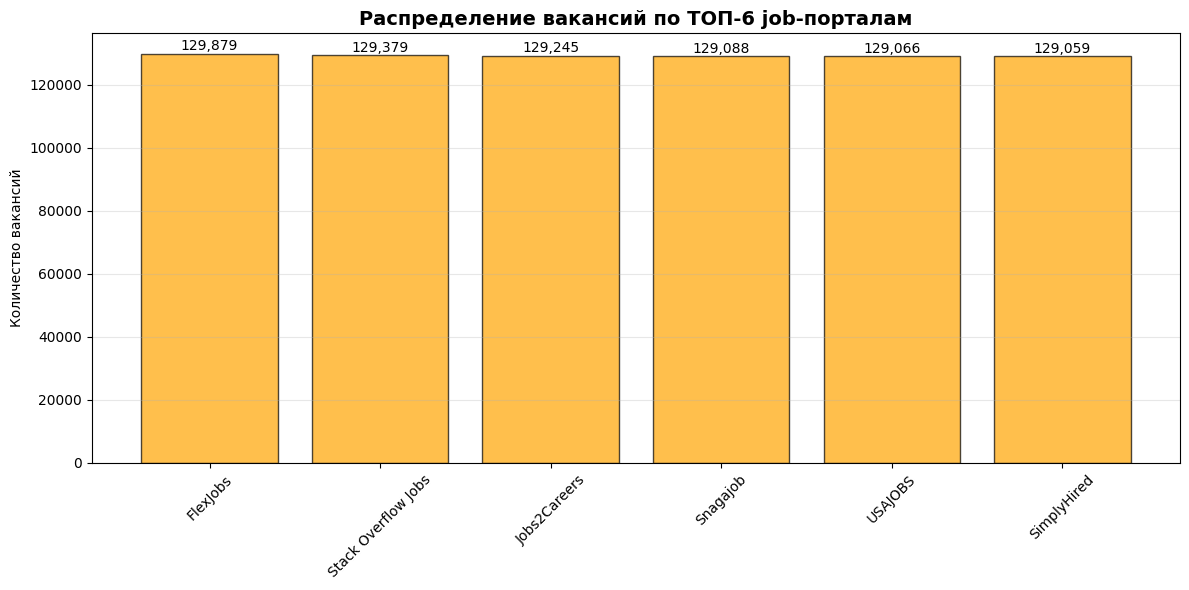

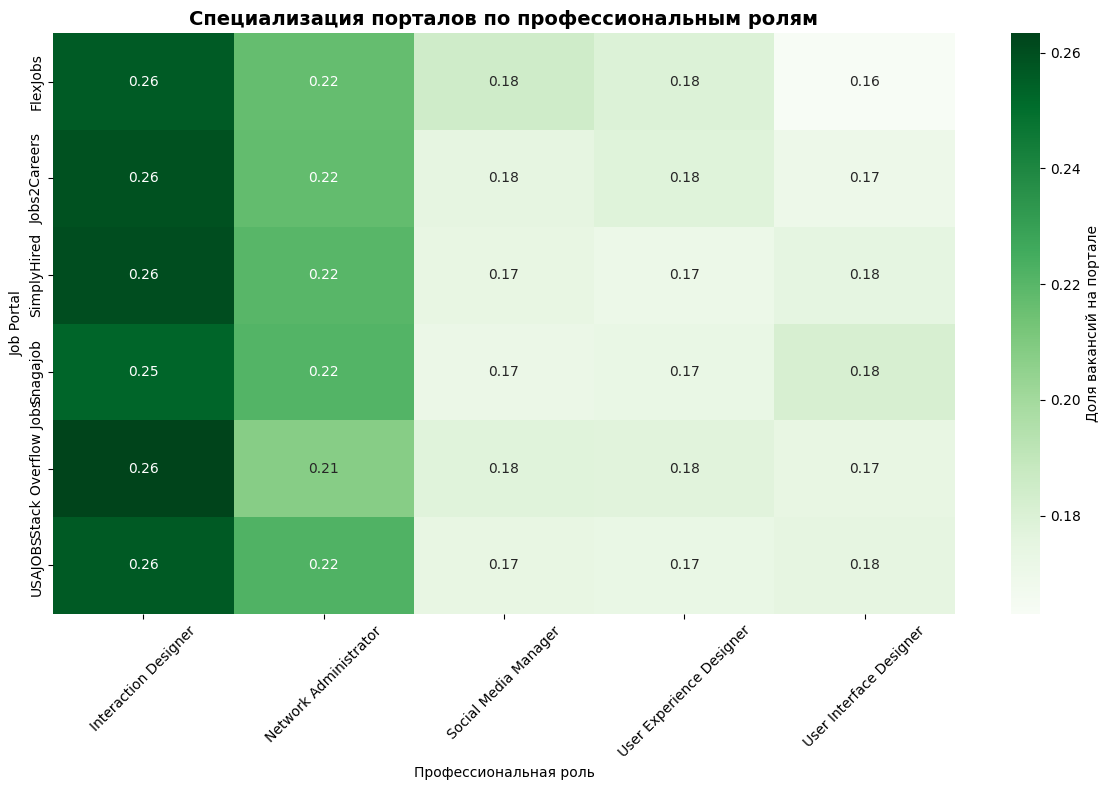

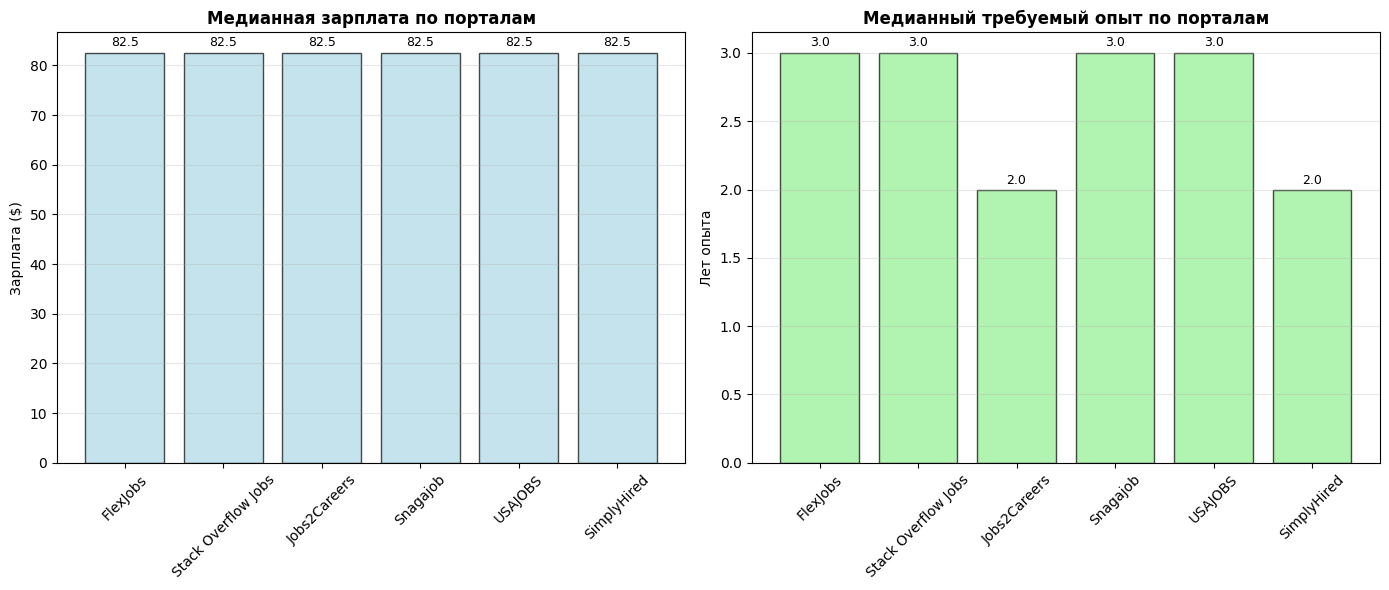


Специализация порталов:
- FlexJobs: Interaction Designer (1.3% вакансий)
- Stack Overflow Jobs: Interaction Designer (1.3% вакансий)
- Jobs2Careers: Interaction Designer (1.3% вакансий)
=== АНАЛИЗ СПЕЦИАЛИЗАЦИИ JOB-ПОРТАЛОВ ===
ТОП-5 порталов по количеству вакансий:
FlexJobs: 129879 вакансий
Stack Overflow Jobs: 129379 вакансий
Jobs2Careers: 129245 вакансий
Snagajob: 129088 вакансий
USAJOBS: 129066 вакансий

АНАЛИЗ СПЕЦИАЛИЗАЦИИ ПО ПРОФЕССИОНАЛЬНЫМ РОЛЯМ

FlexJobs (всего 129879 вакансий):
  1. Interaction Designer: 1656 вакансий (1.3%)
  2. Network Administrator: 1402 вакансий (1.1%)
  3. Social Media Manager: 1195 вакансий (0.9%)
  Степень специализации: 3.3%

Stack Overflow Jobs (всего 129379 вакансий):
  1. Interaction Designer: 1676 вакансий (1.3%)
  2. Network Administrator: 1323 вакансий (1.0%)
  3. Social Media Manager: 1131 вакансий (0.9%)
  Степень специализации: 3.2%

Jobs2Careers (всего 129245 вакансий):
  1. Interaction Designer: 1666 вакансий (1.3%)
  2. Network Administr

In [112]:
print("\n=== ГИПОТЕЗА 5: Специализация job-порталов ===")

# ТОП-6 порталов по количеству вакансий
top_portals = df['Job Portal'].value_counts().head(6).index
portal_data = df[df['Job Portal'].isin(top_portals)]

# 5.1 Распределение вакансий по порталам
plt.figure(figsize=(12, 6))
portal_counts = portal_data['Job Portal'].value_counts()
bars = plt.bar(range(len(portal_counts)), portal_counts.values, 
               color='orange', alpha=0.7, edgecolor='black')
plt.xticks(range(len(portal_counts)), portal_counts.index, rotation=45)
plt.title('Распределение вакансий по ТОП-6 job-порталам', fontsize=14, fontweight='bold')
plt.ylabel('Количество вакансий')
plt.grid(axis='y', alpha=0.3)

# Добавляем значения
for bar, count in zip(bars, portal_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, 
             f'{count:,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 5.2 Специализация по типам ролей
top_5_roles = df['Role'].value_counts().head(5).index
portal_role_data = portal_data[portal_data['Role'].isin(top_5_roles)]

portal_role_pivot = portal_role_data.pivot_table(
    index='Job Portal', 
    columns='Role', 
    values='Job Id', 
    aggfunc='count', 
    fill_value=0
)

# Нормализуем по строкам
portal_role_normalized = portal_role_pivot.div(portal_role_pivot.sum(axis=1), axis=0)

plt.figure(figsize=(12, 8))
sns.heatmap(portal_role_normalized, annot=True, fmt='.2f', cmap='Greens',
           cbar_kws={'label': 'Доля вакансий на портале'})
plt.title('Специализация порталов по профессиональным ролям', fontsize=14, fontweight='bold')
plt.xlabel('Профессиональная роль')
plt.ylabel('Job Portal')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5.3 Сравнение порталов по уровню зарплат и опыта
portal_stats = portal_data.groupby('Job Portal').agg({
    'salary_avg': 'median',
    'experience_years': 'median',
    'Job Id': 'count'
}).round(1)

portal_stats = portal_stats.nlargest(6, 'Job Id')  # Топ-6 по количеству вакансий

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Зарплаты
bars1 = ax1.bar(range(len(portal_stats)), portal_stats['salary_avg'], 
                color='lightblue', alpha=0.7, edgecolor='black')
ax1.set_xticks(range(len(portal_stats)))
ax1.set_xticklabels(portal_stats.index, rotation=45)
ax1.set_title('Медианная зарплата по порталам', fontweight='bold')
ax1.set_ylabel('Зарплата ($)')
ax1.grid(axis='y', alpha=0.3)

# Опыт
bars2 = ax2.bar(range(len(portal_stats)), portal_stats['experience_years'], 
                color='lightgreen', alpha=0.7, edgecolor='black')
ax2.set_xticks(range(len(portal_stats)))
ax2.set_xticklabels(portal_stats.index, rotation=45)
ax2.set_title('Медианный требуемый опыт по порталам', fontweight='bold')
ax2.set_ylabel('Лет опыта')
ax2.grid(axis='y', alpha=0.3)

# Добавляем значения
for bars, ax in zip([bars1, bars2], [ax1, ax2]):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + height*0.01, 
                f'{height:.1f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\nСпециализация порталов:")
for portal in top_portals[:3]:  # Покажем для топ-3
    portal_roles = portal_data[portal_data['Job Portal'] == portal]['Role']
    top_role = portal_roles.value_counts().index[0]
    role_percentage = (portal_roles.value_counts().iloc[0] / len(portal_roles)) * 100
    print(f"- {portal}: {top_role} ({role_percentage:.1f}% вакансий)")
    
    
# Анализ специализации job-порталов
print("=== АНАЛИЗ СПЕЦИАЛИЗАЦИИ JOB-ПОРТАЛОВ ===")

# ТОП-5 порталов по количеству вакансий
top_portals = df['Job Portal'].value_counts().head(5)
print("ТОП-5 порталов по количеству вакансий:")
for portal, count in top_portals.items():
    print(f"{portal}: {count} вакансий")

print("\n" + "="*50)

# Анализ специализации по профессиональным ролям
print("АНАЛИЗ СПЕЦИАЛИЗАЦИИ ПО ПРОФЕССИОНАЛЬНЫМ РОЛЯМ")

portal_role_specialization = []

for portal in top_portals.index:
    portal_data = df[df['Job Portal'] == portal]
    total_vacancies = len(portal_data)
    
    # Анализ топ-3 ролей для каждого портала
    role_distribution = portal_data['Role'].value_counts().head(3)
    
    print(f"\n{portal} (всего {total_vacancies} вакансий):")
    
    portal_specialization = {'Portal': portal, 'Total_Vacancies': total_vacancies}
    
    for i, (role, count) in enumerate(role_distribution.items()):
        percentage = (count / total_vacancies) * 100
        print(f"  {i+1}. {role}: {count} вакансий ({percentage:.1f}%)")
        portal_specialization[f'Top_Role_{i+1}'] = role
        portal_specialization[f'Top_Role_{i+1}_Count'] = count
        portal_specialization[f'Top_Role_{i+1}_Percentage'] = percentage
    
    # Степень специализации (доля топ-3 ролей от общего числа)
    specialization_degree = (role_distribution.sum() / total_vacancies) * 100
    print(f"  Степень специализации: {specialization_degree:.1f}%")
    portal_specialization['Specialization_Degree'] = specialization_degree
    
    portal_role_specialization.append(portal_specialization)

print("\n" + "="*50)

# Анализ специализации по размеру компаний
print("АНАЛИЗ СПЕЦИАЛИЗАЦИИ ПО РАЗМЕРУ КОМПАНИЙ")

portal_company_specialization = []

for portal in top_portals.index:
    portal_data = df[df['Job Portal'] == portal]
    
    # Распределение по размеру компаний
    company_size_distribution = portal_data['Company Size'].value_counts()
    total_with_size = company_size_distribution.sum()
    
    print(f"\n{portal}:")
    
    portal_company_stats = {'Portal': portal}
    
    for company_size, count in company_size_distribution.head(3).items():
        percentage = (count / total_with_size) * 100
        print(f"  {company_size}: {count} вакансий ({percentage:.1f}%)")
        portal_company_stats[company_size] = percentage
    
    # Доминирующий тип компании
    if not company_size_distribution.empty:
        dominant_company_size = company_size_distribution.index[0]
        dominant_percentage = (company_size_distribution.iloc[0] / total_with_size) * 100
        print(f"  Доминирующий тип: {dominant_company_size} ({dominant_percentage:.1f}%)")
        portal_company_stats['Dominant_Company_Size'] = dominant_company_size
        portal_company_stats['Dominant_Percentage'] = dominant_percentage
    
    portal_company_specialization.append(portal_company_stats)

print("\n" + "="*50)

# Анализ различий в требованиях к опыту между порталами
print("АНАЛИЗ РАЗЛИЧИЙ В ТРЕБОВАНИЯХ К ОПЫТУ")

for portal in top_portals.index:
    portal_data = df[df['Job Portal'] == portal]
    exp_median = portal_data['experience_years'].median()
    exp_mean = portal_data['experience_years'].mean()
    
    print(f"{portal}:")
    print(f"  Медианный требуемый опыт: {exp_median:.1f} лет")
    print(f"  Средний требуемый опыт: {exp_mean:.1f} лет")

print("\n" + "="*50)

# Анализ различий в уровне зарплат между порталами
print("АНАЛИЗ РАЗЛИЧИЙ В УРОВНЕ ЗАРПЛАТ")

for portal in top_portals.index:
    portal_data = df[df['Job Portal'] == portal]
    salary_median = portal_data['salary_avg'].median()
    salary_mean = portal_data['salary_avg'].mean()
    
    print(f"{portal}:")
    print(f"  Медианная зарплата: {salary_median:.0f}")
    print(f"  Средняя зарплата: {salary_mean:.0f}")

# Сводная статистика по специализации
print("\n" + "="*50)
print("СВОДНАЯ СТАТИСТИКА ПО СПЕЦИАЛИЗАЦИИ")

if portal_role_specialization:
    avg_specialization = sum([p['Specialization_Degree'] for p in portal_role_specialization]) / len(portal_role_specialization)
    max_specialization = max([p['Specialization_Degree'] for p in portal_role_specialization])
    min_specialization = min([p['Specialization_Degree'] for p in portal_role_specialization])
    
    print(f"Средняя степень специализации порталов: {avg_specialization:.1f}%")
    print(f"Максимальная специализация: {max_specialization:.1f}%")
    print(f"Минимальная специализация: {min_specialization:.1f}%")

In [103]:
def print_hypothesis_stats():
    print("=== СТАТИСТИКА ПО ГИПОТЕЗАМ ===")
    
    print("\n1. Географическое распределение:")
    print(f"   - Количество стран: {df['Country'].nunique()}")
    print(f"   - Количество городов: {df['location'].nunique()}")
    country_median = df.groupby('Country')['salary_avg'].median().sort_values(ascending=False)
    print(f"   - Страна с самой высокой медианной зарплатой: {country_median.index[0]} ({country_median.iloc[0]:.0f})")
    
    print("\n2. Анализ навыков:")
    print(f"   - Количество уникальных ролей: {df['Role'].nunique()}")
    print(f"   - Самая популярная роль: {df['Role'].value_counts().index[0]}")
    
    print("\n3. Временной анализ:")
    print(f"   - Период данных: {df['Job Posting Date'].min()} to {df['Job Posting Date'].max()}")
    print(f"   - Месяц с наибольшим количеством вакансий: {df['posting_month'].value_counts().index[0]}")
    
    print("\n4. Межстрановые различия:")
    target_role = 'Data Scientist'
    role_by_country = df[df['Role'] == target_role].groupby('Country')['experience_years'].mean()
    if len(role_by_country) > 0:
        print(f"   - Для {target_role}:")
        print(f"     * Страна с максимальным опытом: {role_by_country.idxmax()} ({role_by_country.max():.1f} лет)")
        print(f"     * Страна с минимальным опытом: {role_by_country.idxmin()} ({role_by_country.min():.1f} лет)")
    
    print("\n5. Специализация порталов:")
    print(f"   - Количество порталов: {df['Job Portal'].nunique()}")
    print(f"   - Самый популярный портал: {df['Job Portal'].value_counts().index[0]}")
    
    print("\n=== ОБЩАЯ СТАТИСТИКА ДАННЫХ ===")
    print(f"Всего вакансий: {len(df):,}")
    
    completeness = pd.DataFrame({
        'field': ['Salary', 'Experience', 'skills'],
        'completeness': [
            df['salary_avg'].notna().sum() / len(df) * 100,
            df['experience_years'].notna().sum() / len(df) * 100,
            df['skills'].notna().sum() / len(df) * 100
        ]
    })
    
    print("Заполненность ключевых полей:")
    for _, row in completeness.iterrows():
        print(f"  - {row['field']}: {row['completeness']:.1f}%")

print_hypothesis_stats()

=== СТАТИСТИКА ПО ГИПОТЕЗАМ ===

1. Географическое распределение:
   - Количество стран: 216
   - Количество городов: 214
   - Страна с самой высокой медианной зарплатой: Honduras (83)

2. Анализ навыков:
   - Количество уникальных ролей: 376
   - Самая популярная роль: Interaction Designer

3. Временной анализ:
   - Период данных: 2021-09-15 00:00:00 to 2023-09-15 00:00:00
   - Месяц с наибольшим количеством вакансий: 7

4. Межстрановые различия:
   - Для Data Scientist:
     * Страна с максимальным опытом: Saudi Arabia (3.3 лет)
     * Страна с минимальным опытом: Cabo Verde (1.6 лет)

5. Специализация порталов:
   - Количество порталов: 16
   - Самый популярный портал: FlexJobs

=== ОБЩАЯ СТАТИСТИКА ДАННЫХ ===
Всего вакансий: 1,615,940
Заполненность ключевых полей:
  - Salary: 100.0%
  - Experience: 100.0%
  - skills: 100.0%
